# Harnessing Machine Learning for interpersonal physical alignment

### organize the data

In [1]:
import pandas as ps
from pandas import Series, DataFrame
import warnings
warnings.filterwarnings("ignore")

def dfbuilder(files):
    final=ps.DataFrame(columns=['Time_x', 'Experiment_x', ' Hand Type_x', ' # hands_x', ' Position X_x',
       ' Position Y_x', ' Position Z_x', ' Velocity X_x', ' Velocity Y_x',
       ' Velocity Z_x', ' Pitch_x', ' Roll_x', ' Yaw_x', ' Wrist Pos X_x',
       ' Wrist Pos Y_x', ' Wrist Pos Z_x', ' Elbow pos X_x', ' Elbow Pos Y_x',
       ' Elbow Pos Z_x', ' Grab Strenth_x', ' Grab Angle_x',' Pinch Strength_x', 
       'Time_y', 'Experiment_y',
       ' Hand Type_y', ' # hands_y', ' Position X_y', ' Position Y_y',
       ' Position Z_y', ' Velocity X_y', ' Velocity Y_y', ' Velocity Z_y',
       ' Pitch_y', ' Roll_y', ' Yaw_y', ' Wrist Pos X_y', ' Wrist Pos Y_y',
       ' Wrist Pos Z_y', ' Elbow pos X_y', ' Elbow Pos Y_y', ' Elbow Pos Z_y',
       ' Grab Strenth_y', ' Grab Angle_y', ' Pinch Strength_y'])
    for file in files:
        temp=ps.read_csv(file)
        temp=temp.ix[700:]
        temp[" Hand Type"]=Series([1 if i=="right" else 2 for i in temp[" Hand Type"]])
        if str.__contains__(file,"Alone"):  
            temp.insert(loc=1, column='Experiment', value="1")
            temp=temp.drop(' Frame ID',axis=1)
            Handright=ps.read_csv('HandRight.csv')
            Handright[" Hand Type"]=Series([1 if i=="right" else 2 for i in Handright[" Hand Type"]])
            Handright.insert(loc=1, column='Experiment', value="1")
            Handright = Handright.iloc[:len(temp)-1]
            Handright = Handright.reset_index(drop=True)
            Handright=Handright.drop(' Frame ID',axis=1)
            temp = temp.reset_index(drop=True)
            temp = ps.merge(temp, Handright, left_index=True, right_index=True)
        else:
            if str.__contains__(file,"Sync"):
                temp.insert(loc=1, column='Experiment', value="2")
            if str.__contains__(file,"Spontan"):
                temp.insert(loc=1, column='Experiment', value="3") 
            dfright=temp[temp[" Hand Type"]==1]
            dfleft=temp[temp[" Hand Type"]==2]
            dfright.set_index(' Frame ID',inplace=True)
            dfleft.set_index(' Frame ID',inplace=True)
            temp=ps.merge(dfleft, dfright, how='left',on=' Frame ID') 
        final=ps.concat([final,temp])
        
    final=final.drop(["Experiment_y"],axis=1) 
    final=final.dropna()
    final[final.index%20==2]
    final.sort_index(inplace=True)
    return final

In [2]:
import glob
test= dfbuilder(glob.glob('C:/Users/lilac/Downloads/last/Unity Data/Validation/**/*.csv', recursive=True))
train= dfbuilder(glob.glob('C:/Users/lilac/Downloads/last/Unity Data/Training/**/*.csv', recursive=True))
#train=train.sort_values(by=['Frame ID_x'])
train.head()


,Time_x,Experiment_x,Hand Type_x,# hands_x,Position X_x,Position Y_x,Position Z_x,Velocity X_x,Velocity Y_x,Velocity Z_x,...,Yaw_y,Wrist Pos X_y,Wrist Pos Y_y,Wrist Pos Z_y,Elbow pos X_y,Elbow Pos Y_y,Elbow Pos Z_y,Grab Strenth_y,Grab Angle_y,Pinch Strength_y
0,507.6639,1,2.0,1,-54.173900,404.6508,102.53100,-46.375400,-141.2727,-30.21356,...,-0.2778,46.88831,207.3548,86.23589,203.8337,49.33507,237.4553,0.0,0.206389,0.0
0,300.3558,1,2.0,1,0.483595,263.7752,48.87287,-73.144260,247.4470,-70.95473,...,-0.2778,46.88831,207.3548,86.23589,203.8337,49.33507,237.4553,0.0,0.206389,0.0
0,465.7203,1,2.0,1,-20.202960,196.3637,27.31069,-1.707349,180.4482,39.11984,...,-0.2778,46.88831,207.3548,86.23589,203.8337,49.33507,237.4553,0.0,0.206389,0.0
0,399.2171,1,2.0,1,-168.143600,213.8697,-117.56460,-78.960600,149.8754,-29.06095,...,-0.2778,46.88831,207.3548,86.23589,203.8337,49.33507,237.4553,0.0,0.206389,0.0
0,573.0565,1,2.0,1,-90.512630,170.7388,-30.87672,-449.169100,182.5208,237.29880,...,-0.2778,46.88831,207.3548,86.23589,203.8337,49.33507,237.4553,0.0,0.206389,0.0


## graph

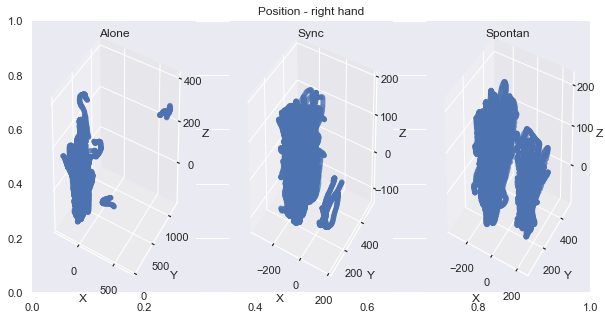

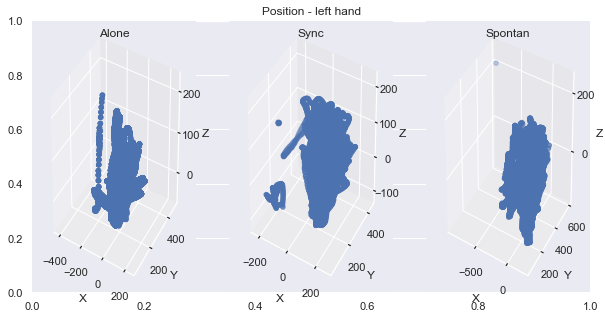

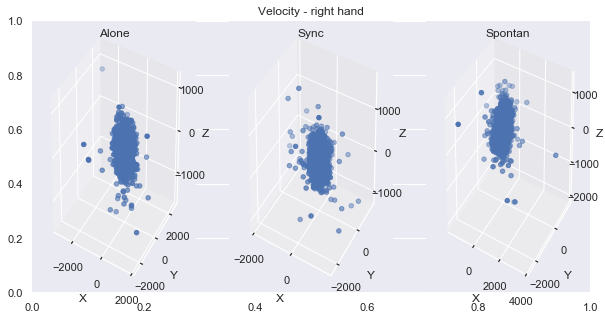

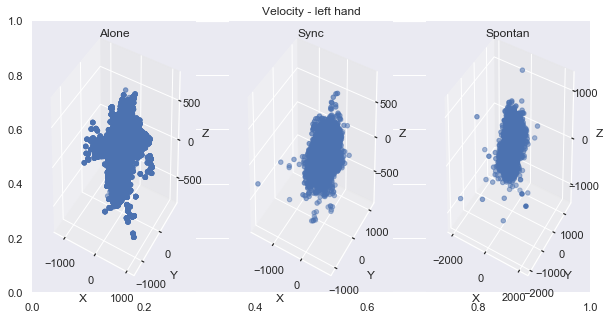

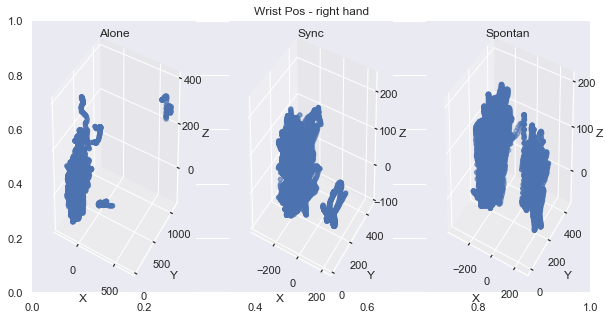

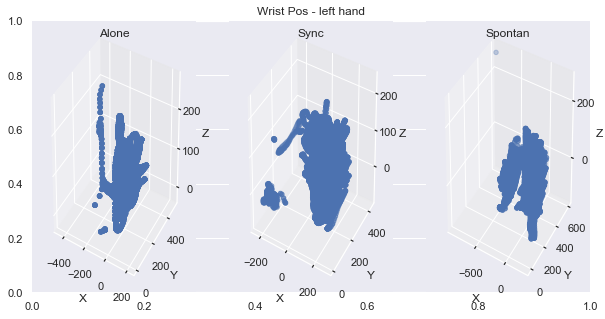

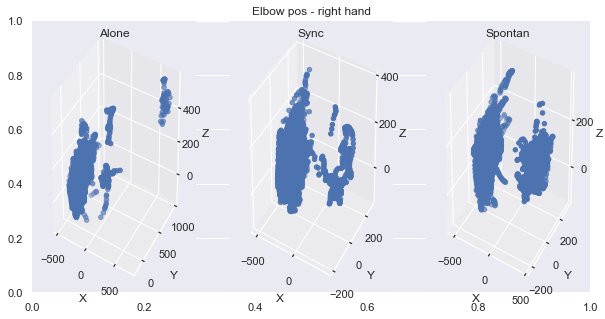

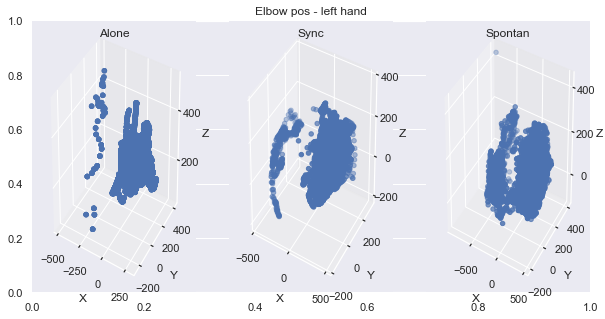

In [49]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

for pose in ["Position", "Velocity", "Wrist Pos"]:
    fig = plt.figure(figsize=(10,5))
    plt.title(pose+" - right hand")
    for i in range(1,4):
        ax = fig.add_subplot(1,3,i, projection='3d')
        x = train[train['Experiment_x']==str(i)][" "+pose+" X_x"]
        y = train[train['Experiment_x']==str(i)][" "+pose+" Y_x"]
        z = train[train['Experiment_x']==str(i)][" "+pose+" Z_x"]
        ax.scatter(x, y, z,)
        ax.set_xlabel('X')
        ax.set_ylabel('Y')
        ax.set_zlabel('Z')
        if(i==1):
            plt.title("Alone")
        else:
            if(i==2):
                plt.title("Sync")
            else:
                plt.title("Spontan")
        
    fig = plt.figure(figsize=(10,5))
    plt.title(pose+" - left hand")   
    for i in range(1,4):   
        ax = fig.add_subplot(1,3,i, projection='3d')
        x = train[train['Experiment_x']==str(i)][" "+pose+" X_y"]
        y = train[train['Experiment_x']==str(i)][" "+pose+" Y_y"]
        z = train[train['Experiment_x']==str(i)][" "+pose+" Z_y"]
        ax.scatter(x, y, z,)
        ax.set_xlabel('X')
        ax.set_ylabel('Y')
        ax.set_zlabel('Z')
        if(i==1):
            plt.title("Alone")
        else:
            if(i==2):
                plt.title("Sync")
            else:
                plt.title("Spontan")

fig = plt.figure(figsize=(10,5))
plt.title("Elbow pos - right hand")
for i in range(1,4):   
    ax = fig.add_subplot(1,3,i, projection='3d')
    x = train[train['Experiment_x']==str(i)][" Elbow pos X_x"]
    y = train[train['Experiment_x']==str(i)][" Elbow Pos Y_x"]
    z = train[train['Experiment_x']==str(i)][" Elbow Pos Z_x"]
    ax.scatter(x, y, z,)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    if(i==1):
        plt.title("Alone")
    else:
        if(i==2):
            plt.title("Sync")
        else:
            plt.title("Spontan")
        
fig = plt.figure(figsize=(10,5))
plt.title("Elbow pos - left hand")   
for i in range(1,4):   
    ax = fig.add_subplot(1,3,i, projection='3d')
    x = train[train['Experiment_x']==str(i)][" Elbow pos X_y"]
    y = train[train['Experiment_x']==str(i)][" Elbow Pos Y_y"]
    z = train[train['Experiment_x']==str(i)][" Elbow Pos Z_y"]
    ax.scatter(x, y, z,)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    if(i==1):
        plt.title("Alone")
    else:
        if(i==2):
            plt.title("Sync")
        else:
            plt.title("Spontan")
plt.show()

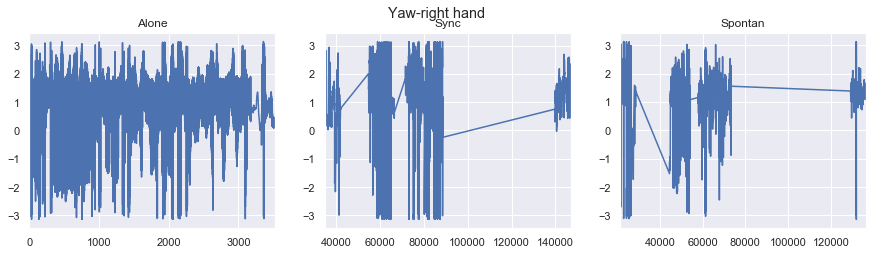

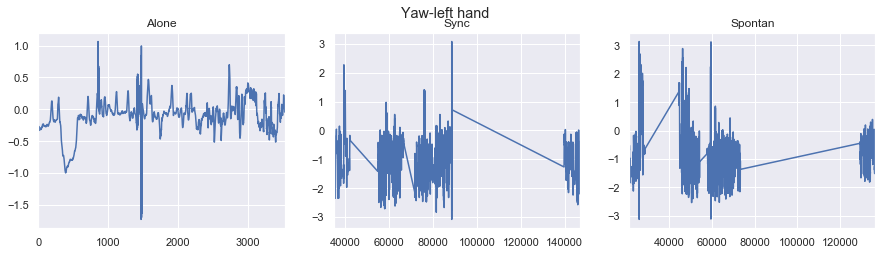

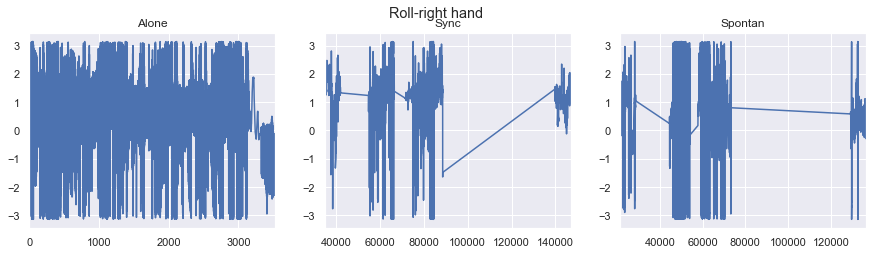

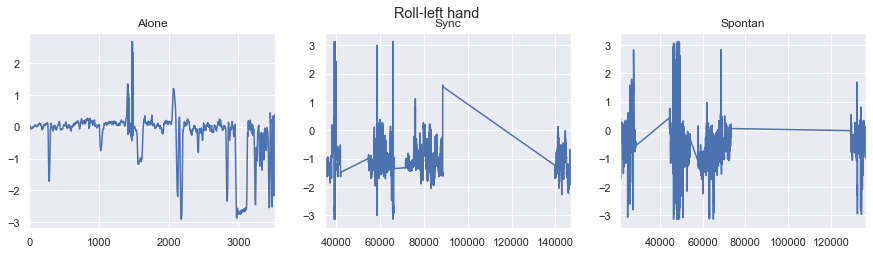

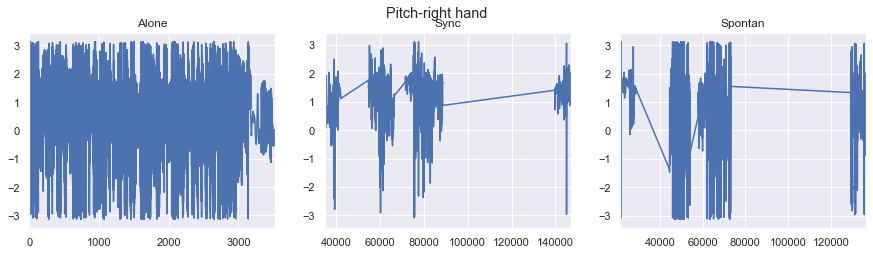

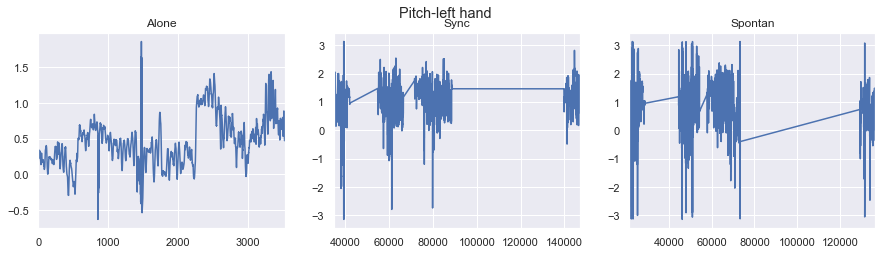

In [4]:
import seaborn as sns
sns.set()
#train.sort_index(inplace=True)
for move in [" Yaw"," Roll"," Pitch"]:
    fig=plt.figure(figsize=(15,3.6))
    fig.suptitle(move+"-right hand")    
    for i in range(1,4):
        plt.subplot(1,3,i)
        train[train['Experiment_x']==str(i)][move+'_x'].plot()
        if(i==1):
            plt.title("Alone")
        else:
            if(i==2):
                plt.title("Sync")
            else:
                plt.title("Spontan")
       
    fig=plt.figure(figsize=(15,3.6))
    fig.suptitle(move+"-left hand")    
    for i in range(1,4):
        plt.subplot(1,3,i)
        train[train['Experiment_x']==str(i)][move+'_y'].plot()
        if(i==1):
            plt.title("Alone")
        else:
            if(i==2):
                plt.title("Sync")
            else:
                plt.title("Spontan")

1 = Alone
2 = Sync
3 = Spontan


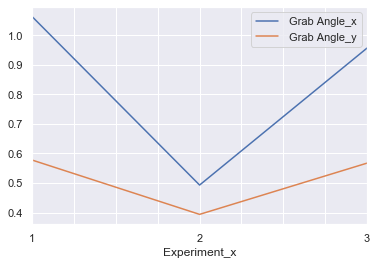

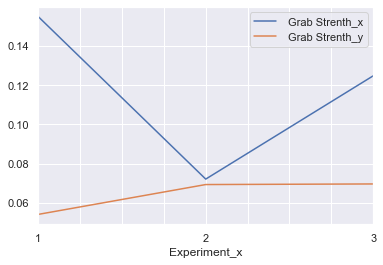

In [5]:
train.groupby(['Experiment_x'])[' Grab Angle_x',' Grab Angle_y'].mean().plot()
train.groupby(['Experiment_x'])[' Grab Strenth_x',' Grab Strenth_y'].mean().plot()
print("1 = Alone")
print("2 = Sync")
print("3 = Spontan")

# Models

In [6]:

X_train=train[['Time_x', ' Hand Type_x', ' Position X_x',
       ' Position Y_x', ' Position Z_x', ' Velocity X_x', ' Velocity Y_x',
       ' Velocity Z_x', ' Pitch_x', ' Roll_x', ' Yaw_x', ' Wrist Pos X_x',
       ' Wrist Pos Y_x', ' Wrist Pos Z_x', ' Elbow pos X_x', ' Elbow Pos Y_x',
       ' Elbow Pos Z_x', ' Grab Strenth_x', ' Grab Angle_x',
       ' Pinch Strength_x', 'Time_y', ' Hand Type_y',
       ' Position X_y', ' Position Y_y', ' Position Z_y',
       ' Velocity X_y', ' Velocity Y_y', ' Velocity Z_y', ' Pitch_y',
       ' Roll_y', ' Yaw_y', ' Wrist Pos X_y', ' Wrist Pos Y_y',
       ' Wrist Pos Z_y', ' Elbow pos X_y', ' Elbow Pos Y_y', ' Elbow Pos Z_y',
       ' Grab Strenth_y', ' Grab Angle_y', ' Pinch Strength_y']]
y_train=train['Experiment_x']
X_test=test[['Time_x', ' Hand Type_x', ' Position X_x',
       ' Position Y_x', ' Position Z_x', ' Velocity X_x', ' Velocity Y_x',
       ' Velocity Z_x', ' Pitch_x', ' Roll_x', ' Yaw_x', ' Wrist Pos X_x',
       ' Wrist Pos Y_x', ' Wrist Pos Z_x', ' Elbow pos X_x', ' Elbow Pos Y_x',
       ' Elbow Pos Z_x', ' Grab Strenth_x', ' Grab Angle_x',
       ' Pinch Strength_x', 'Time_y', ' Hand Type_y',
       ' Position X_y', ' Position Y_y', ' Position Z_y',
       ' Velocity X_y', ' Velocity Y_y', ' Velocity Z_y', ' Pitch_y',
       ' Roll_y', ' Yaw_y', ' Wrist Pos X_y', ' Wrist Pos Y_y',
       ' Wrist Pos Z_y', ' Elbow pos X_y', ' Elbow Pos Y_y', ' Elbow Pos Z_y',
       ' Grab Strenth_y', ' Grab Angle_y', ' Pinch Strength_y']]
y_test=test['Experiment_x']
print("Training FeatureSet:", X_train.shape)
print("Training Labels:", y_train.shape)
print("Testing FeatureSet:", X_test.shape)
print("Testing Labels:", y_test.shape)

Training FeatureSet: (88369, 40)
Training Labels: (88369,)
Testing FeatureSet: (25233, 40)
Testing Labels: (25233,)


## null classifer

In [7]:
from sklearn.dummy import DummyClassifier
dummy = DummyClassifier(strategy="uniform")
dummy.fit(X_train, y_train)
print("test score:",dummy.score(X_test,y_test))
print("train score:",dummy.score(X_train,y_train))

test score: 0.3349978203146673
train score: 0.33377089250755354


In [8]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(X_train)
X_t_train = pca.transform(X_train)
X_t_test = pca.transform(X_test)
print("Score from the PCA")
print("test score:",dummy.score(X_t_test,y_test))
print("train score:",dummy.score(X_t_train,y_train))


Score from the PCA
test score: 0.32830024174691874
train score: 0.3320395161199063


In [9]:
from sklearn.decomposition import FastICA
ica = FastICA()
ica.fit(X_train)
X_t_train = ica.transform(X_train)
X_t_test = ica.transform(X_test)
print("Score from the ICA")
print("test score:",dummy.score(X_t_test,y_test))
print("train score:",dummy.score(X_t_train,y_train))

Score from the ICA
test score: 0.3329766575516189
train score: 0.3347327682784687


In [10]:
from sklearn.metrics import f1_score
y_pred=dummy.predict(X_test)
print("F1 Score:",f1_score(y_test, y_pred,average='weighted'))

F1 Score: 0.33474094103219315


In [11]:
from sklearn import metrics
metrics.confusion_matrix(y_test, y_pred)
df_confusion = ps.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True)
df_confusion

Predicted,1,2,3,All
Actual,,,,
1,2523,2472,2369,7364
2,2951,2895,2960,8806
3,3045,3004,3014,9063
All,8519,8371,8343,25233


In [12]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.30      0.34      0.32      7364
           2       0.35      0.33      0.34      8806
           3       0.36      0.33      0.35      9063

    accuracy                           0.33     25233
   macro avg       0.33      0.33      0.33     25233
weighted avg       0.34      0.33      0.33     25233



## naive_bayes

In [13]:
X_train=train[[' Position Z_x',  ' Velocity Y_x',' Pitch_x', ' Roll_x',  
       ' Wrist Pos Y_x', ' Wrist Pos Z_x',  ' Elbow Pos Y_x',' Elbow Pos Z_x',  ' Grab Angle_x',  
       ' Position X_y', ' Position Y_y', ' Position Z_y',
       ' Velocity X_y', ' Velocity Y_y', ' Velocity Z_y', ' Pitch_y',
       ' Roll_y',  ' Wrist Pos X_y', ' Wrist Pos Y_y',' Elbow Pos Z_y',' Grab Strenth_y']]
X_test=test[[' Position Z_x', ' Velocity Y_x',' Pitch_x', ' Roll_x',  
       ' Wrist Pos Y_x', ' Wrist Pos Z_x',  ' Elbow Pos Y_x',
       ' Elbow Pos Z_x',  ' Grab Angle_x',' Position X_y', ' Position Y_y', ' Position Z_y',
       ' Velocity X_y', ' Velocity Y_y', ' Velocity Z_y', ' Pitch_y',
       ' Roll_y',  ' Wrist Pos X_y', ' Wrist Pos Y_y', ' Elbow Pos Z_y',' Grab Strenth_y']]

In [14]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf=clf.fit(X_train,y_train)
print("test score:",clf.score(X_test,y_test))
print("train score:",clf.score(X_train,y_train))

test score: 0.8357309871993025
train score: 0.7963878735755752


In [15]:
from sklearn.metrics import f1_score
y_pred=clf.predict(X_test)
print("F1 Score:",f1_score(y_test, y_pred,average='weighted'))

F1 Score: 0.8347932937456671


In [16]:
from sklearn import metrics
metrics.confusion_matrix(y_test, y_pred)
df_confusion = ps.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True)
df_confusion

Predicted,1,2,3,All
Actual,,,,
1,7154,20,190,7364
2,119,6232,2455,8806
3,151,1210,7702,9063
All,7424,7462,10347,25233


In [17]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.96      0.97      0.97      7364
           2       0.84      0.71      0.77      8806
           3       0.74      0.85      0.79      9063

    accuracy                           0.84     25233
   macro avg       0.85      0.84      0.84     25233
weighted avg       0.84      0.84      0.83     25233



In [18]:
from sklearn.decomposition import PCA
pca = PCA(n_components=20)
X_t_train = pca.fit_transform(X_train)
X_t_test = pca.fit_transform(X_test)
clf.fit(X_t_train,y_train)
print("Score from the PCA")
print("test score:",clf.score(X_t_test,y_test))
print("train score:",clf.score(X_t_train,y_train))    

Score from the PCA
test score: 0.5440890896841438
train score: 0.7767656078489062


In [34]:
from sklearn.decomposition import FastICA
ica = FastICA(n_components=5,random_state=1)
X_t_train = ica.fit_transform(X_train)
X_t_test = ica.fit_transform(X_test)
clf.fit(X_t_train,y_train)
print("Score from the ICA")
print("test score:",clf.score(X_t_test,y_test))
print("train score:",clf.score(X_t_train,y_train))

Score from the ICA
test score: 0.44691475448817025
train score: 0.7288868268284127


## Logistic Regression

In [35]:
X_train=train[['Time_x',  ' Position X_x',' Velocity Y_x',
          ' Yaw_x', ' Wrist Pos X_x',' Elbow pos X_x', ' Elbow Pos Y_x',
          ' Elbow Pos Z_x', ' Grab Strenth_x', ' Grab Angle_x',
          ' Pinch Strength_x', 'Time_y',
          ' Position X_y', ' Position Y_y', ' Position Z_y',
          ' Velocity Y_y', ' Velocity Z_y', ' Pitch_y',
          ' Roll_y', ' Yaw_y', ' Wrist Pos X_y', ' Wrist Pos Y_y',
          ' Elbow pos X_y', ' Elbow Pos Y_y', ' Elbow Pos Z_y',
          ' Grab Strenth_y', ' Grab Angle_y']]
X_test=test[['Time_x',  ' Position X_x',' Velocity Y_x',
         ' Yaw_x', ' Wrist Pos X_x',' Elbow pos X_x', ' Elbow Pos Y_x',
         ' Elbow Pos Z_x', ' Grab Strenth_x', ' Grab Angle_x',
         ' Pinch Strength_x', 'Time_y', 
         ' Position X_y', ' Position Y_y', ' Position Z_y',
         ' Velocity Y_y', ' Velocity Z_y', ' Pitch_y',
         ' Roll_y', ' Yaw_y', ' Wrist Pos X_y', ' Wrist Pos Y_y',
         ' Elbow pos X_y', ' Elbow Pos Y_y', ' Elbow Pos Z_y',
         ' Grab Strenth_y', ' Grab Angle_y' ]]

In [36]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
print("test score:",logreg.score(X_test,y_test))
print("train score:",logreg.score(X_train,y_train))

test score: 0.6972615226092815
train score: 0.9028165985809503


In [37]:
y_pred=logreg.predict(X_test)
f1_score(y_test, y_pred,average='weighted')

0.6966410619633682

In [38]:
metrics.confusion_matrix(y_test, y_pred)
df_confusion = ps.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True)
df_confusion

Predicted,1,2,3,All
Actual,,,,
1,7364,0,0,7364
2,0,5460,3346,8806
3,0,4293,4770,9063
All,7364,9753,8116,25233


In [39]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00      7364
           2       0.56      0.62      0.59      8806
           3       0.59      0.53      0.56      9063

    accuracy                           0.70     25233
   macro avg       0.72      0.72      0.71     25233
weighted avg       0.70      0.70      0.70     25233



In [40]:
pca = PCA(n_components=21)
X_t_train = pca.fit_transform(X_train)
X_t_test = pca.fit_transform(X_test)
logreg.fit(X_t_train,y_train)
print("Score from the PCA")
print("test score:",logreg.score(X_t_test,y_test))
print("train score:",logreg.score(X_t_train,y_train))


Score from the PCA
test score: 0.2881147703404272
train score: 0.8976903665312497


In [41]:
ica = FastICA(n_components=4,random_state=1)
X_t_train = ica.fit_transform(X_train)
X_t_test = ica.fit_transform(X_test)
logreg.fit(X_t_train,y_train)
print("Score from the ICA")
print("test score:",logreg.score(X_t_test,y_test))
print("train score:",logreg.score(X_t_train,y_train))

Score from the ICA
test score: 0.6198232473348393
train score: 0.7622695741719381


## ADABOOST

In [42]:
X_train=train[[ ' Pitch_x', ' Wrist Pos X_x',' Wrist Pos Y_x',  ' Position X_y',  ' Position Z_y', ' Velocity X_y',  
                ' Pitch_y', ' Roll_y', ' Wrist Pos X_y', ' Wrist Pos Y_y',' Wrist Pos Z_y',' Elbow Pos Y_y', 
                ' Grab Angle_y']]
X_test=test[[ ' Pitch_x', ' Wrist Pos X_x',' Wrist Pos Y_x', ' Position X_y', ' Position Z_y',
              ' Velocity X_y',  ' Pitch_y',' Roll_y', ' Wrist Pos X_y', ' Wrist Pos Y_y',
              ' Wrist Pos Z_y',  ' Elbow Pos Y_y', ' Grab Angle_y']]

In [43]:
from sklearn.ensemble import AdaBoostClassifier
clf = AdaBoostClassifier(n_estimators=59)
clf=clf.fit(X_train,y_train)
print("test score:",clf.score(X_test,y_test))
print("train score:",clf.score(X_train,y_train))

test score: 0.797487417271034
train score: 0.8343197275062522


In [44]:
y_pred=clf.predict(X_test)
f1_score(y_test, y_pred ,average='weighted')

0.7954171287997128

In [45]:
metrics.confusion_matrix(y_test, y_pred)
df_confusion = ps.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True)
df_confusion

Predicted,1,2,3,All
Actual,,,,
1,7286,46,32,7364
2,65,5457,3284,8806
3,13,1670,7380,9063
All,7364,7173,10696,25233


In [46]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.99      0.99      0.99      7364
           2       0.76      0.62      0.68      8806
           3       0.69      0.81      0.75      9063

    accuracy                           0.80     25233
   macro avg       0.81      0.81      0.81     25233
weighted avg       0.80      0.80      0.80     25233



In [47]:
pca = PCA(n_components=2)
X_t_train = pca.fit_transform(X_train)
X_t_test = pca.fit_transform(X_test)
clf.fit(X_t_train,y_train)
print("Score from the PCA")
print("test score:",clf.score(X_t_test,y_test))
print("train score:",clf.score(X_t_train,y_train))

Score from the PCA
test score: 0.6446716601276107
train score: 0.7430433749391755


In [48]:
ica = FastICA(n_components=2,random_state=1)
X_t_train = ica.fit_transform(X_train)
X_t_test = ica.fit_transform(X_test)
clf.fit(X_t_train,y_train)
print("Score from the ICA")
print("test score:",clf.score(X_t_test,y_test))
print("train score:",clf.score(X_t_train,y_train))

Score from the ICA
test score: 0.60975706416201
train score: 0.7595763220133758
